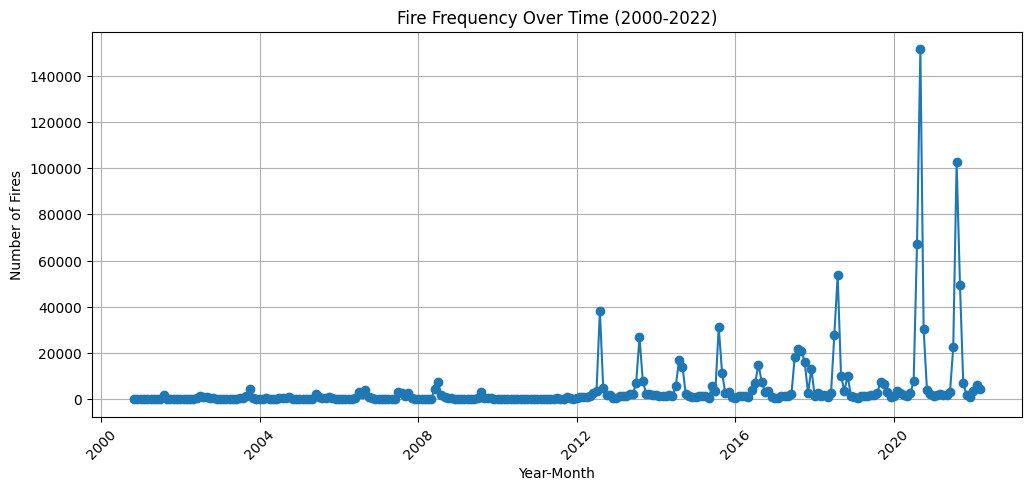

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./frequency/frequency_data/ca_daily_fire_2000_03252022.csv")

df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)

df['Year-Month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)  # Ensuring two-digit month format

fire_counts = df['Year-Month'].value_counts().sort_index()

fire_counts_df = fire_counts.reset_index()
fire_counts_df.columns = ['Year-Month', 'Fire Count']
fire_counts_df['Year-Month'] = pd.to_datetime(fire_counts_df['Year-Month'], format='%Y-%m')

plt.figure(figsize=(12, 5))
plt.plot(fire_counts_df['Year-Month'], fire_counts_df['Fire Count'], marker='o', linestyle='-')
plt.xlabel("Year-Month")
plt.ylabel("Number of Fires")
plt.title("Fire Frequency Over Time (2000-2022)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [2]:


# Load environmental conditions data
env_df = pd.read_csv("./environmental/all_conditions.csv")

# Convert Date to datetime format
env_df['Date'] = pd.to_datetime(env_df['Date'], format='%m/%d/%Y')

# Extract Year-Month for merging
env_df['Year-Month'] = env_df['Date'].dt.strftime('%Y-%m')

# Select only numeric columns for aggregation
numeric_cols = env_df.select_dtypes(include=['number']).columns

# Aggregate numeric columns by monthly mean
env_monthly = env_df.groupby('Year-Month')[numeric_cols].mean().reset_index()

# Display processed environmental data
print(env_monthly.head())

  Year-Month      Stn Id  ETo (in)  Precip (in)  Sol Rad (Ly/day)  \
0    2018-01  153.011236  0.056242     0.075451        204.709694   
1    2018-02  152.720303  0.102572     0.012345        343.988206   
2    2018-03  155.168763  0.114007     0.104046        382.150681   
3    2018-04  154.425779  0.181392     0.033323        537.929741   
4    2018-05  154.614399  0.205004     0.009867        591.478350   

   Avg Vap Pres (mBars)  Max Air Temp (F)  Min Air Temp (F)  Avg Air Temp (F)  \
0              9.269166         63.767808         41.157748         51.476378   
1              6.967762         65.493092         36.562791         50.270795   
2              9.254638         65.433438         41.998742         53.364675   
3              9.986503         73.096910         46.250053         59.437031   
4             11.737689         76.287138         51.231950         63.254445   

   Max Rel Hum (%)  Min Rel Hum (%)  Avg Rel Hum (%)  Dew Point (F)  \
0        87.881631        5

In [3]:
fire_counts_df['Year-Month'] = pd.to_datetime(fire_counts_df['Year-Month']).dt.strftime('%Y-%m')

# Merge datasets again
merged_df = pd.merge(fire_counts_df, env_monthly, on='Year-Month', how='inner')

print("Merged Data Shape:", merged_df.shape)
print(merged_df.head())

Merged Data Shape: (33, 18)
  Year-Month  Fire Count      Stn Id  ETo (in)  Precip (in)  Sol Rad (Ly/day)  \
0    2018-01        1697  153.011236  0.056242     0.075451        204.709694   
1    2018-02        2787  152.720303  0.102572     0.012345        343.988206   
2    2018-03        1307  155.168763  0.114007     0.104046        382.150681   
3    2018-04        1749  154.425779  0.181392     0.033323        537.929741   
4    2018-05        1266  154.614399  0.205004     0.009867        591.478350   

   Avg Vap Pres (mBars)  Max Air Temp (F)  Min Air Temp (F)  Avg Air Temp (F)  \
0              9.269166         63.767808         41.157748         51.476378   
1              6.967762         65.493092         36.562791         50.270795   
2              9.254638         65.433438         41.998742         53.364675   
3              9.986503         73.096910         46.250053         59.437031   
4             11.737689         76.287138         51.231950         63.254445   

In [4]:
# Convert 'Year-Month' in fire_counts_df to match env_monthly format
fire_counts_df['Year-Month'] = pd.to_datetime(fire_counts_df['Year-Month']).dt.strftime('%Y-%m')

# Merge datasets again
merged_df = pd.merge(fire_counts_df, env_monthly, on='Year-Month', how='inner')

print("Merged Data Shape:", merged_df.shape)
print(merged_df.head())


Merged Data Shape: (33, 18)
  Year-Month  Fire Count      Stn Id  ETo (in)  Precip (in)  Sol Rad (Ly/day)  \
0    2018-01        1697  153.011236  0.056242     0.075451        204.709694   
1    2018-02        2787  152.720303  0.102572     0.012345        343.988206   
2    2018-03        1307  155.168763  0.114007     0.104046        382.150681   
3    2018-04        1749  154.425779  0.181392     0.033323        537.929741   
4    2018-05        1266  154.614399  0.205004     0.009867        591.478350   

   Avg Vap Pres (mBars)  Max Air Temp (F)  Min Air Temp (F)  Avg Air Temp (F)  \
0              9.269166         63.767808         41.157748         51.476378   
1              6.967762         65.493092         36.562791         50.270795   
2              9.254638         65.433438         41.998742         53.364675   
3              9.986503         73.096910         46.250053         59.437031   
4             11.737689         76.287138         51.231950         63.254445   

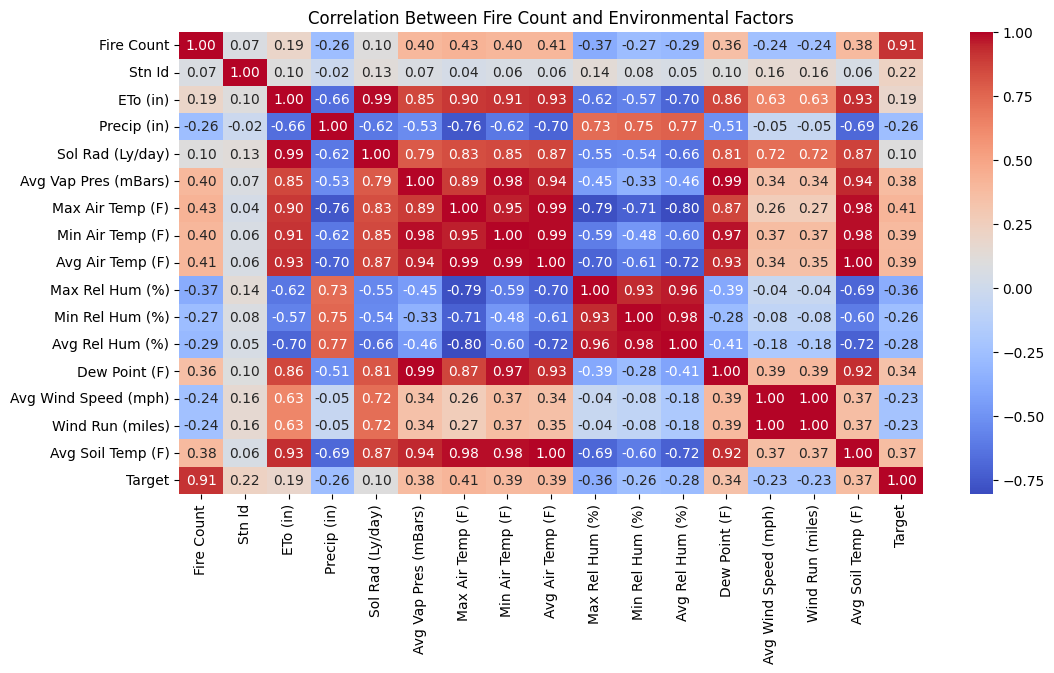

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns
numeric_df = merged_df.drop(columns=['Year-Month'])  # Ensure only numeric data

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Fire Count and Environmental Factors")
plt.show()

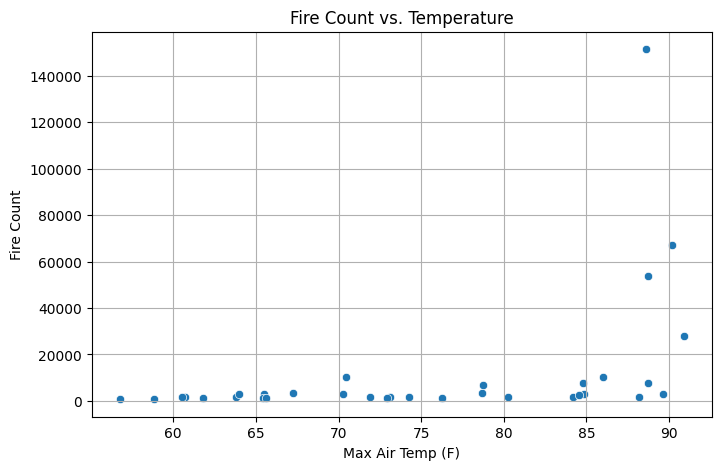

In [6]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=merged_df['Max Air Temp (F)'], y=merged_df['Fire Count'])
plt.xlabel("Max Air Temp (F)")
plt.ylabel("Fire Count")
plt.title("Fire Count vs. Temperature")
plt.grid()
plt.show()


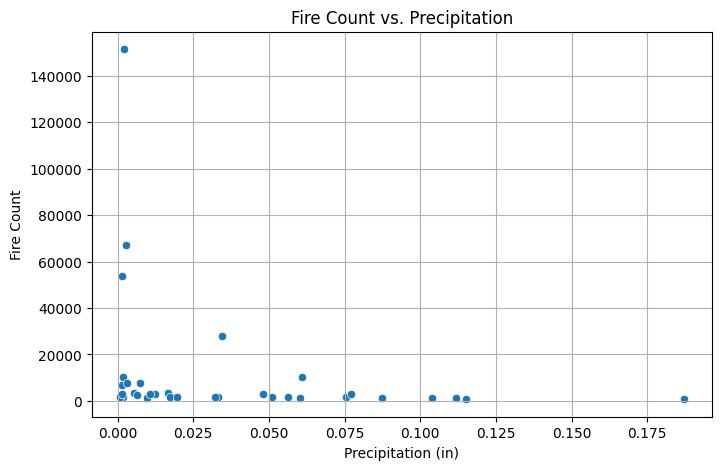

In [7]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=merged_df['Precip (in)'], y=merged_df['Fire Count'])
plt.xlabel("Precipitation (in)")
plt.ylabel("Fire Count")
plt.title("Fire Count vs. Precipitation")
plt.grid()
plt.show()


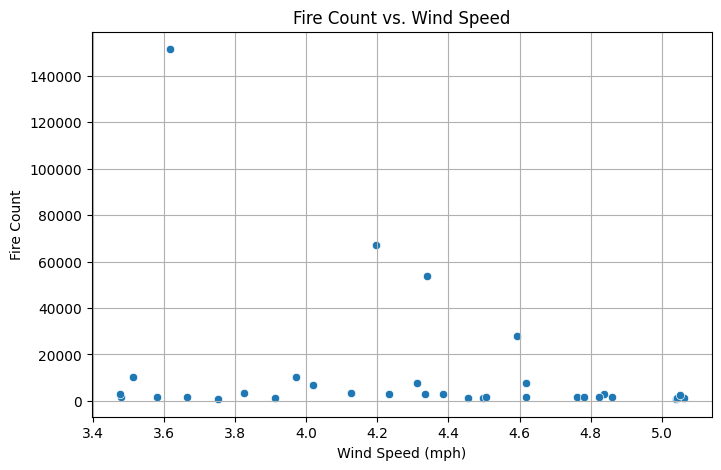

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=merged_df['Avg Wind Speed (mph)'], y=merged_df['Fire Count'])
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Fire Count")
plt.title("Fire Count vs. Wind Speed")
plt.grid()
plt.show()


In [9]:
from scipy.stats import pearsonr

# Correlation and p-value for temperature
corr_temp, p_temp = pearsonr(merged_df['Max Air Temp (F)'], merged_df['Fire Count'])
print(f"Correlation between Fire Count and Max Temp: {corr_temp:.2f} (p-value: {p_temp:.3f})")

# Correlation and p-value for precipitation
corr_precip, p_precip = pearsonr(merged_df['Precip (in)'], merged_df['Fire Count'])
print(f"Correlation between Fire Count and Precipitation: {corr_precip:.2f} (p-value: {p_precip:.3f})")

# Correlation and p-value for wind speed
corr_wind, p_wind = pearsonr(merged_df['Avg Wind Speed (mph)'], merged_df['Fire Count'])
print(f"Correlation between Fire Count and Wind Speed: {corr_wind:.2f} (p-value: {p_wind:.3f})")


Correlation between Fire Count and Max Temp: 0.43 (p-value: 0.013)
Correlation between Fire Count and Precipitation: -0.26 (p-value: 0.140)
Correlation between Fire Count and Wind Speed: -0.24 (p-value: 0.176)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
# from xgboost import XGBRegressor

# merged_df['Fire Count Lag1'] = merged_df['Fire Count'].shift(1)
# merged_df['Fire Count Lag2'] = merged_df['Fire Count'].shift(2)

# Define predictors (X) and target (y)
X = merged_df[['Max Air Temp (F)', 'Precip (in)', 'Avg Wind Speed (mph)']]
y = merged_df['Fire Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print(f"Random Forest R² Score: {r2_score(y_test, y_pred_rf):.2f}")

Random Forest R² Score: 0.13


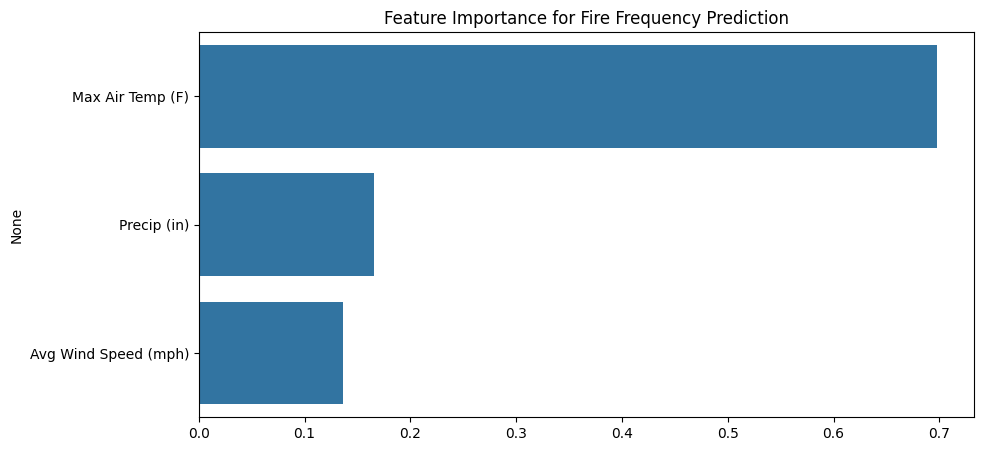

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance for Fire Frequency Prediction")
plt.show()


In [20]:
import pandas as pd

water_df = pd.read_csv("./water_usage/water_usage.csv")
water_df.head()

/var/folders/dj/b7ldvr151y34bynm0y5xb7hw0000gn/T/ipykernel_49862/4000575032.py:4: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  water_df = pd.read_csv("./water_usage/water_usage.csv")


,EAR URL,Regulating Agency,Water System Name,Principal County Served,Federal Water System Type,State Water System Type,System Status,Owner Type,Primary Water Source Type,Residential Population IN SDWIS,...,Month,DateStartOfMonth,Water Produced or Delivered,TypeCode,TypeName,Units of Measure As Reported,Quantity as in Units Reported,CALCULATED Quantity in AF,CALCULATED Quantity in Gallons,Connections
0,https://ear.waterboards.ca.gov/TakeSurvey/Curr...,DISTRICT 20 - RIVERSIDE,CHINO BASIN DESALTER AUTH. - DESALTER 2,RIVERSIDE,Community,Community,Active,Local,Groundwater,NaN,...,April,4/1/2022,Water Delivered,A,Agriculture,NaN,NaN,NaN,NaN,0.0
1,https://ear.waterboards.ca.gov/TakeSurvey/Curr...,LPA64 - SACRAMENTO COUNTY,KO-KET RESORT,SACRAMENTO,Transient Non-Community,Transient Non-Community,Active,Private,Groundwater,NaN,...,April,4/1/2022,Water Delivered,A,Agriculture,NaN,NaN,NaN,NaN,0.0
2,https://ear.waterboards.ca.gov/TakeSurvey/Curr...,LPA64 - SACRAMENTO COUNTY,BROOKSIDE EQUESTRIAN PARK,SACRAMENTO,Transient Non-Community,Transient Non-Community,Active,Private,Groundwater,NaN,...,April,4/1/2022,Water Delivered,A,Agriculture,NaN,NaN,NaN,NaN,0.0
3,https://ear.waterboards.ca.gov/TakeSurvey/Curr...,LPA64 - SACRAMENTO COUNTY,BRADSHAW RANCH GOLF COURSE INC,SACRAMENTO,Transient Non-Community,Transient Non-Community,Active,Private,Groundwater,NaN,...,April,4/1/2022,Water Delivered,A,Agriculture,NaN,0.0,0.0,0.0,0.0
4,https://ear.waterboards.ca.gov/TakeSurvey/Curr...,LPA64 - SACRAMENTO COUNTY,SHERMAN LAKE MARINA,SACRAMENTO,Transient Non-Community,Transient Non-Community,Active,Private,Groundwater,NaN,...,April,4/1/2022,Water Delivered,A,Agriculture,NaN,NaN,NaN,NaN,0.0


In [21]:
water_df.columns

Index(['EAR URL', 'Regulating Agency', 'Water System Name',
       'Principal County Served', 'Federal Water System Type',
       'State Water System Type', 'System Status', 'Owner Type',
       'Primary Water Source Type', 'Residential Population IN SDWIS',
       'Non-Transient Population IN SDWIS', 'Transient Population IN SDWIS',
       'Total Population IN SDWIS',
       'Number of Agricultural Service Connections (AG)  IN SDWIS',
       'Number of Combined Service Connections (CB)  IN SDWIS',
       'Number of Commercial Service Connections (CM)  IN SDWIS',
       'Number of Institutional Service Connections (IN) IN SDWIS',
       'Number of Residential Service Connections (RS)  IN SDWIS',
       'Total Number of Service Connections IN SDWIS', 'CITY',
       'Treatment Plant Class', 'Distribution System Class', 'PWSID', 'Year',
       'Month', 'DateStartOfMonth', 'Water Produced or Delivered', 'TypeCode',
       'TypeName', 'Units of Measure As Reported',
       'Quantity as in U